In [140]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Fragments

In [141]:
# Goal: Test basic rdkit functionality by testing molecules for OH, CO2H,
# and NH2.  Will be used to search HMDB for possible neutral losses.

# http://asteeves.github.io/blog/2015/01/12/molecules-in-rdkit/

In [226]:
def neutral_loss_finder(structure):
    # Can find arbitrary structures, as long as targets are in SMARTS.
    # https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html
    
    # Hydroxyl in alcohol
    hydroxy = Chem.MolFromSmarts('[CX4][OX2H]') 
    
    # Primary or secondary amine, not amide.
    amine = Chem.MolFromSmarts('[NX3;H2,H1;!$(NC=O)]') # Similiar issue, especially oxidation.
    
    # Carboxylic acid or conjugate base.
    carboxyl = Chem.MolFromSmarts('[CX3](=O)[OX1H0-,OX2H1]')

    targets = {"-OH": hydroxy, "-NH2": amine, "CO2H":carboxyl}
    
    for k, v in targets.items():
        print(k,": ", structure.HasSubstructMatch(v))

In [227]:
def fragment_finder(molecule):
    # Will only work for predefined statements.
    
    aliphatic_carboxylic_acids = Chem.Fragments.fr_Al_COO(molecule)
    aliphatic_hydroxyl_groups = Chem.Fragments.fr_Al_OH(molecule)
    primary_amines = Chem.Fragments.fr_NH2(molecule)
    return({"-CO2": aliphatic_carboxylic_acids,
            "-OH": aliphatic_hydroxyl_groups,
            "-NH2": primary_amines})

In [228]:
# Test cases

ser = Chem.MolFromSmiles('C(C(C(=O)O)N)O')
val = Chem.MolFromSmiles('CC(C)C(C(=O)O)N')
phenol = Chem.MolFromSmiles('C1=CC=C(C=C1)O')

In [229]:
Chem.MolToSmiles(ser)

'NC(CO)C(=O)O'

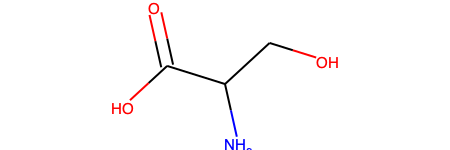

In [230]:
ser

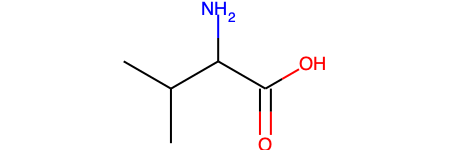

In [231]:
val

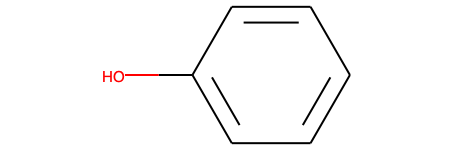

In [232]:
phenol

In [233]:
ser_results = neutral_loss_finder(ser)

-OH :  True
-NH2 :  True
CO2H :  True


In [234]:
val_results = neutral_loss_finder(val)

-OH :  False
-NH2 :  True
CO2H :  True


In [235]:
phenol_results = neutral_loss_finder(phenol)

-OH :  False
-NH2 :  False
CO2H :  False


In [236]:
phenol_results

In [237]:
ser_results_2 = fragment_finder(ser)

In [238]:
ser_results_2

{'-CO2': 1, '-OH': 1, '-NH2': 1}

In [239]:
val_results_2 = fragment_finder(val)

In [240]:
val_results_2

{'-CO2': 1, '-OH': 0, '-NH2': 1}